<a href="https://colab.research.google.com/github/imabari/covid19-data/blob/master/toyama/toyama_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

富山県のデータで作成

※わかりやすいようにグラフ表示していますが値の場合は「.plot.bar()」を削除

In [27]:
!pip install japanize-matplotlib

In [28]:
!pip install -U pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import japanize_matplotlib

# 設定

In [0]:
COUNTS_FILE = "toyama_counts.csv"
PATIENTS_FILE = "toyama_patients.csv"

# ダウンロード

In [32]:
!wget "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=0&single=true&output=csv" -O $PATIENTS_FILE
!wget "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=574469870&single=true&output=csv" -O $COUNTS_FILE

--2020-04-26 07:53:08--  https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=0&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 108.177.97.138, 108.177.97.102, 108.177.97.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘toyama_patients.csv’

toyama_patients.csv     [ <=>                ]  12.62K  --.-KB/s    in 0s      

2020-04-26 07:53:09 (51.7 MB/s) - ‘toyama_patients.csv’ saved [12925]

--2020-04-26 07:53:10--  https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=574469870&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 108.177.97.113, 108.177.97.102, 108.177.97.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.113|:443... conne

# 内容確認

## 日別データ

In [33]:
df_counts = pd.read_csv(COUNTS_FILE, index_col="年月日", parse_dates=True, dtype={"備考": "object"})

df_counts.head(10)

,検査実施人数,陰性人数,陽性人数,一般相談件数,帰国者相談件数,退院者数,死亡者数,備考
年月日,,,,,,,,
2020-02-27,24,24,0,1614,96,0,0,当日以前の分も含めて累計で表示
2020-02-28,0,0,0,144,8,0,0,NaN
2020-02-29,0,0,0,43,4,0,0,NaN
2020-03-01,1,1,0,29,4,0,0,NaN
2020-03-02,1,1,0,165,6,0,0,NaN
2020-03-03,2,2,0,129,8,0,0,NaN
2020-03-04,3,3,0,113,10,0,0,NaN
2020-03-05,3,3,0,90,6,0,0,NaN
2020-03-06,4,4,0,102,9,0,0,NaN


## 患者データ

In [34]:
df_kanja = pd.read_csv(PATIENTS_FILE, index_col="No", dtype={"発症日": "object", "年代": "object", "備考": "object"})

df_kanja.head(10)

,市番号,検査結果判明日,年代,性別,居住地,職業,市区町村名,発症日,状態,症状,渡航歴の有無,備考
No,,,,,,,,,,,,
1,感染者1,2020-03-30,20代,女,富山市,卒業生,富山市,NaN,入院中,軽症・中等症,x,NaN
2,A,2020-03-31,20代,女,南砺市,看護師,NaN,NaN,入院中,軽症・中等症,x,NaN
3,感染者2,2020-03-31,20代,女,富山市,保育士,富山市,NaN,入院中,無症状,x,NaN
4,感染者3,2020-03-31,20代,女,富山市,就職予定者,富山市,NaN,入院中,軽症・中等症,x,NaN
5,‐,2020-04-01,20代,男,射水市,新規採用教員,NaN,NaN,入院中,軽症・中等症,x,NaN
6,感染者4,2020-04-01,50代,女,富山市,介護施設職員,富山市,NaN,入院中,軽症・中等症,x,NaN
7,感染者5,2020-04-01,20代,男,富山市,会社員,富山市,NaN,入院中,無症状,x,NaN
8,-,2020-04-02,50代,女,射水市,国家公務員,NaN,NaN,入院中,軽症・中等症,x,NaN
9,感染者6,2020-04-04,20代,女,富山市,飲食店店員,富山市,NaN,入院中,軽症・中等症,x,NaN


# 一般

## 検査実施状況

In [35]:
df_counts.tail(1)

,検査実施人数,陰性人数,陽性人数,一般相談件数,帰国者相談件数,退院者数,死亡者数,備考
年月日,,,,,,,,
2020-04-22,155,145,10,416,30,1,1,NaN


## 陽性患者数

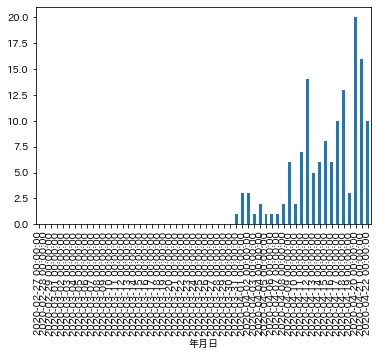

In [36]:
#日別
df_counts["陽性人数"].plot.bar()

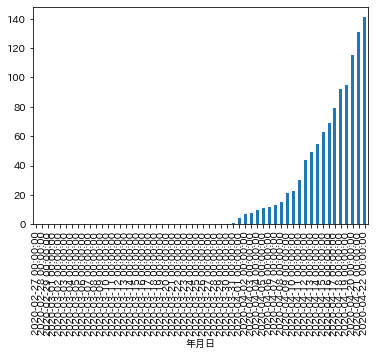

In [37]:
# 累計
df_counts["陽性人数"].cumsum().plot.bar()

## 検査実施人数

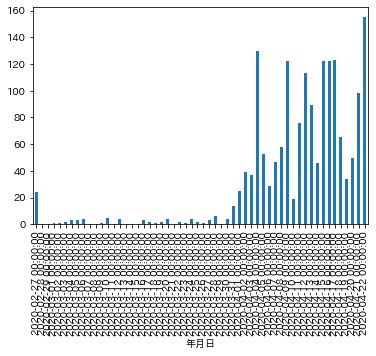

In [38]:
# 日別
df_counts["検査実施人数"].plot.bar()

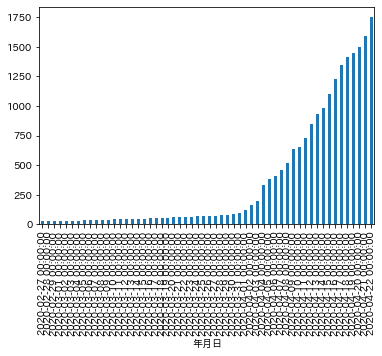

In [39]:
# 累計
df_counts["検査実施人数"].cumsum().plot.bar()

## 相談件数

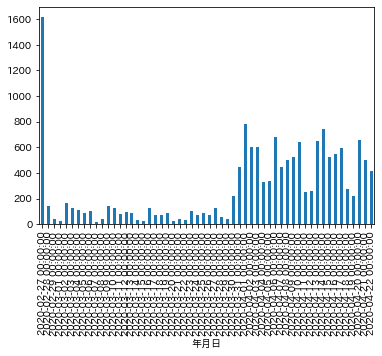

In [40]:
# 日別
df_counts["一般相談件数"].plot.bar()

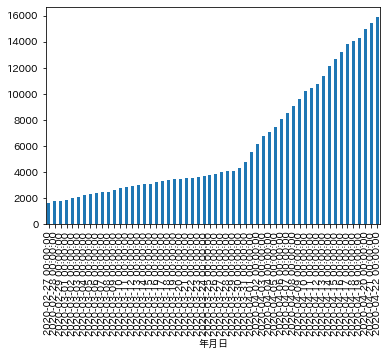

In [41]:
# 累計
df_counts["一般相談件数"].cumsum().plot.bar()

# その他

## 現在患者数

現在患者数とは、陽性人数から退院者数と死亡者数を除いた人数です。

In [0]:
df_counts["現在患者数"] = df_counts["陽性人数"] - df_counts["退院者数"] - df_counts["死亡者数"]

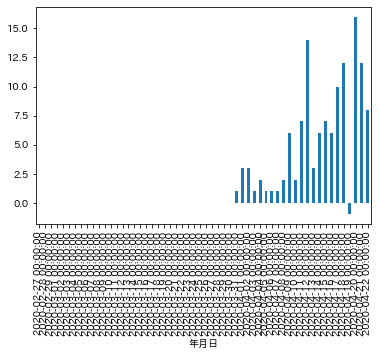

In [43]:
# 日別
df_counts["現在患者数"].plot.bar()

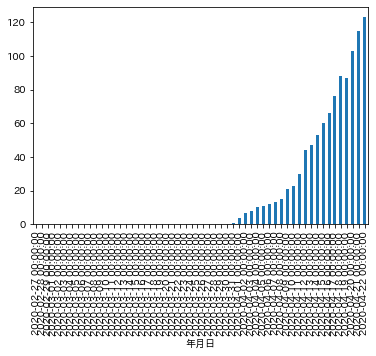

In [44]:
# 累計
df_counts["現在患者数"].cumsum().plot.bar()

## 治療修了者数

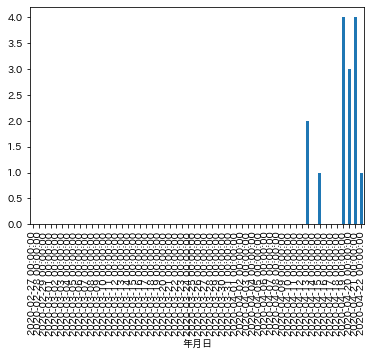

In [45]:
# 日別
df_counts["退院者数"].plot.bar()

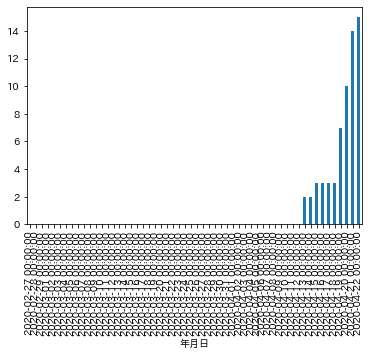

In [46]:
# 累計
df_counts["退院者数"].cumsum().plot.bar()

## 年代別

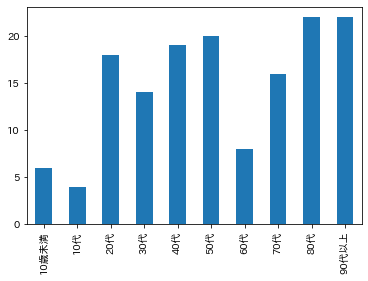

In [47]:
age_lists = ["10歳未満", "10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代", "90代以上"]
df_kanja["年代"].value_counts().reindex(age_lists).plot.bar()

## 居住地別

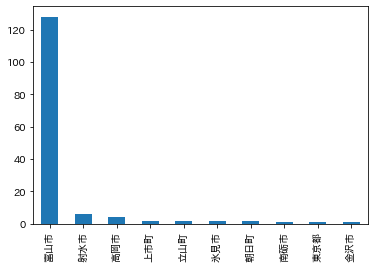

In [48]:
df_kanja["居住地"].value_counts().plot.bar()

## 陽性率

In [0]:
df_positive = df_counts.loc[:, ["検査実施人数", "陽性人数"]].copy()

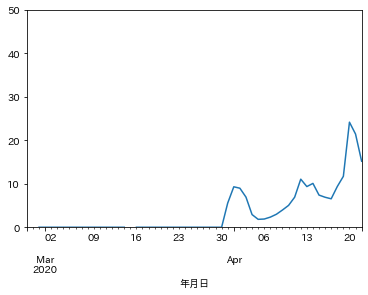

In [50]:
# 3日間平均
df_positive_3d = df_positive.rolling(window=3).mean()
df_positive_3d["陽性率"] = df_positive_3d["陽性人数"] / df_positive_3d["検査実施人数"] * 100
df_positive_3d["陽性率"].plot(ylim=(0, 50))

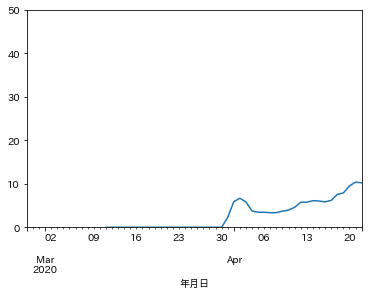

In [51]:
# 14日間平均
df_positive_2w = df_positive.rolling(window=14).mean()
df_positive_2w["陽性率"] = df_positive_2w["陽性人数"] / df_positive_2w["検査実施人数"] * 100
df_positive_2w["陽性率"].plot(ylim=(0, 50))

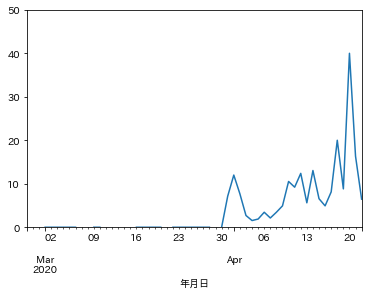

In [52]:
# 補正なし
df_positive["陽性率"] = df_positive["陽性人数"] / df_positive["検査実施人数"] * 100
df_positive["陽性率"].plot(ylim=(0, 50))